# **QP 3 - Qual o desempenho (em tempo de execução) destes modelos**

## **Execution Time Comparison**

/tmp/ipython-input-351474051.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = ax1.boxplot([data_collection_time],
/tmp/ipython-input-351474051.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = ax2.boxplot([filtered_suite_time, complete_suite_time],
/tmp/ipython-input-351474051.py:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


GRÁFICO 1: Análise de Tempo de Execução

Tempo para Coleta dos Dados:
  Média: 787.63s
  Mediana: 793.16s
  Desvio padrão: 12.00s
  Mínimo: 768.56s
  Máximo: 808.56s
  Q1: 777.78s
  Q3: 794.93s

Tempo Conjunto de Testes Filtrados:
  Média: 16416.23s
  Mediana: 16433.84s
  Desvio padrão: 147.89s
  Mínimo: 16154.12s
  Máximo: 16757.35s
  Q1: 16323.35s
  Q3: 16491.08s

Tempo Conjunto de Testes Completos:
  Média: 18388.07s
  Mediana: 18331.51s
  Desvio padrão: 155.52s
  Mínimo: 18156.25s
  Máximo: 18694.17s
  Q1: 18303.31s
  Q3: 18495.10s


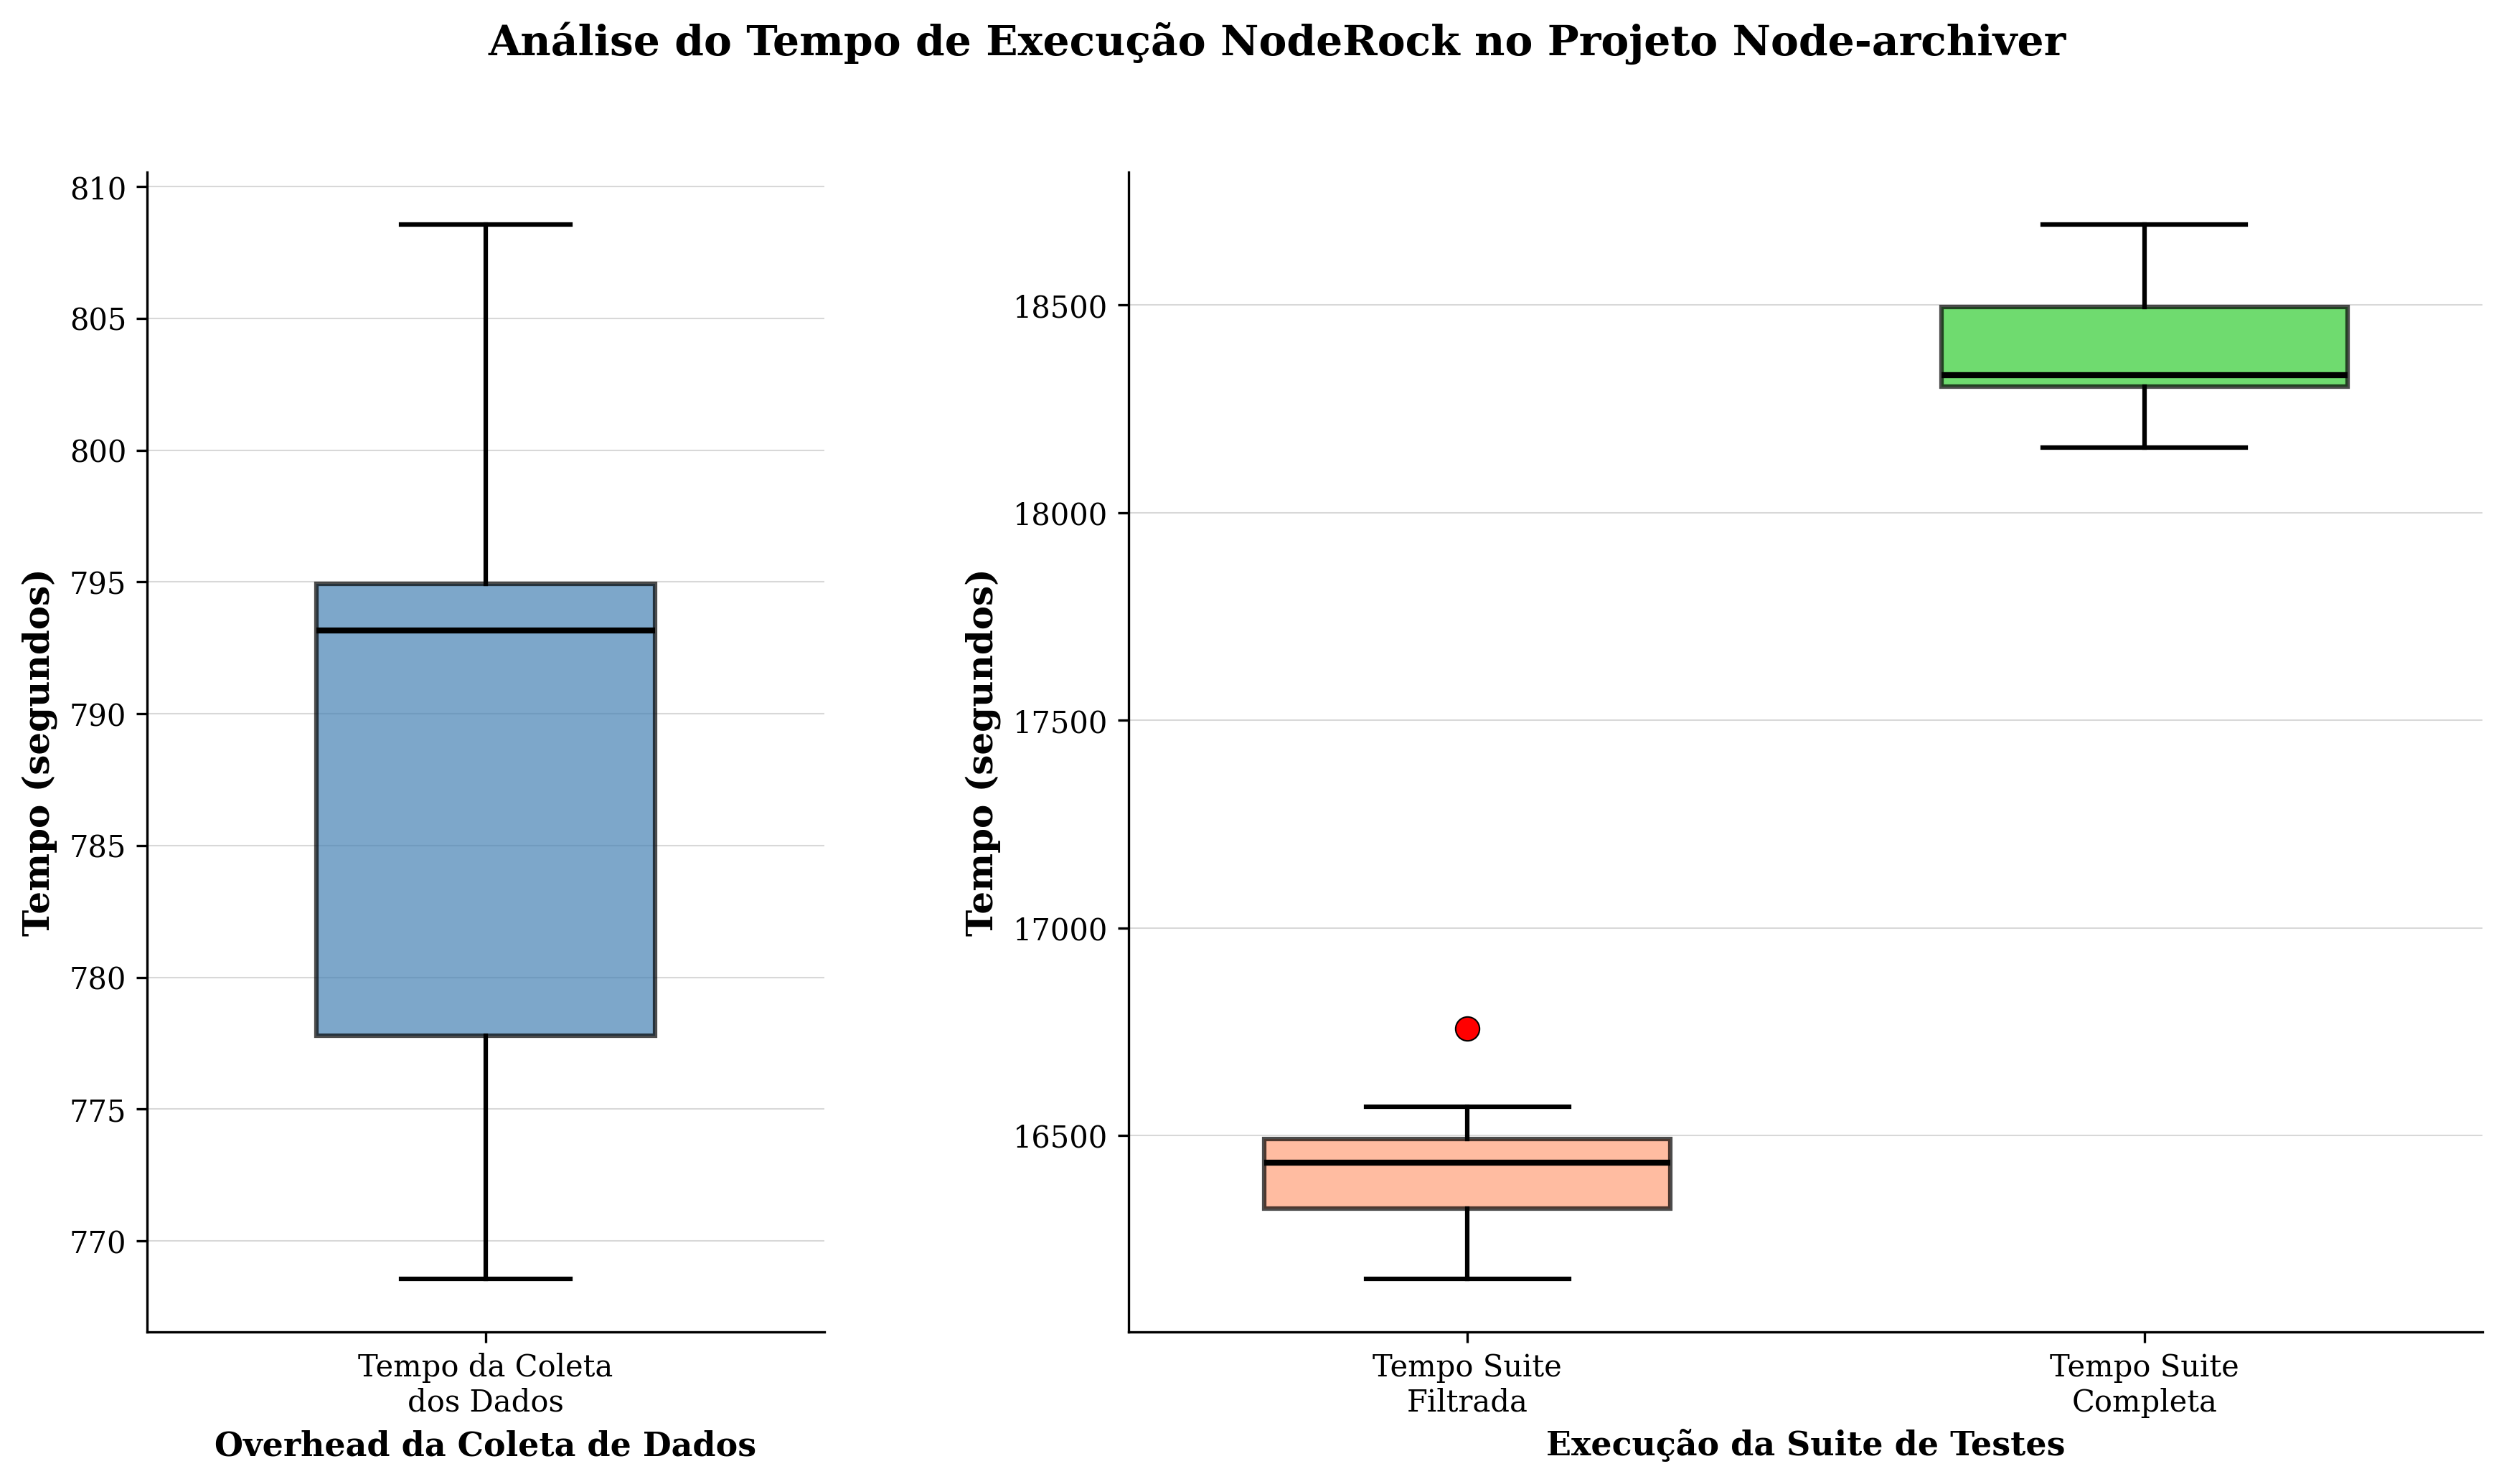

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['grid.alpha'] = 0.3

data_collection_time     = [769.69, 793.16, 793.51, 780.97, 777.05, 799.63, 793.91, 778.51, 768.56, 808.56, 794.11, 787.38, 801.64, 795.75, 772.04]
filtered_suite_time      = [16154.12, 16168.44, 16757.35, 16505.00, 16407.21, 16433.84, 16335.89, 16420.45, 16489.22, 16569.15, 16457.38, 16310.82, 16283.28, 16458.30, 16492.95]
complete_suite_time      = [18667.05, 18167.92, 18262.36, 18694.17, 18302.92, 18310.85, 18401.20, 18379.77, 18321.12, 18532.01, 18303.71, 18156.25, 18331.51, 18469.02, 18521.18]

cor_data_collection = '#4682B4'   # Azul aço
cor_filtered = '#FFA07A'          # Salmão claro
cor_complete = '#32CD32'          # Verde lima

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), dpi=300,
                                gridspec_kw={'width_ratios': [1, 2], 'wspace': 0.3})

bp1 = ax1.boxplot([data_collection_time],
                   labels=['Tempo da Coleta\ndos Dados'],
                   patch_artist=True,
                   widths=0.5,
                   medianprops=dict(color='black', linewidth=2),
                   boxprops=dict(linewidth=1.5, edgecolor='black'),
                   whiskerprops=dict(linewidth=1.5, color='black'),
                   capprops=dict(linewidth=1.5, color='black'),
                   flierprops=dict(marker='o', markerfacecolor='red', markersize=8,
                                  linestyle='none', markeredgecolor='black', markeredgewidth=0.5))

bp1['boxes'][0].set_facecolor(cor_data_collection)
bp1['boxes'][0].set_alpha(0.7)

ax1.set_ylabel('Tempo (segundos)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Overhead da Coleta de Dados', fontsize=11, fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.grid(True, axis='y', linestyle='-', alpha=0.3, color='gray', linewidth=0.5)
ax1.set_axisbelow(True)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
for spine in ax1.spines.values():
    if spine.get_visible():
        spine.set_linewidth(0.8)
        spine.set_color('black')

bp2 = ax2.boxplot([filtered_suite_time, complete_suite_time],
                   labels=['Tempo Suite\nFiltrada', 'Tempo Suite\nCompleta'],
                   patch_artist=True,
                   widths=0.6,
                   medianprops=dict(color='black', linewidth=2),
                   boxprops=dict(linewidth=1.5, edgecolor='black'),
                   whiskerprops=dict(linewidth=1.5, color='black'),
                   capprops=dict(linewidth=1.5, color='black'),
                   flierprops=dict(marker='o', markerfacecolor='red', markersize=8,
                                  linestyle='none', markeredgecolor='black', markeredgewidth=0.5))

colors = [cor_filtered, cor_complete]
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_ylabel('Tempo (segundos)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Execução da Suite de Testes', fontsize=11, fontweight='bold')
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.grid(True, axis='y', linestyle='-', alpha=0.3, color='gray', linewidth=0.5)
ax2.set_axisbelow(True)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
for spine in ax2.spines.values():
    if spine.get_visible():
        spine.set_linewidth(0.8)
        spine.set_color('black')

fig.suptitle('Análise do Tempo de Execução NodeRock no Projeto Node-archiver', fontsize=14, fontweight='bold', y=0.98)

datasets = [data_collection_time, filtered_suite_time, complete_suite_time]
labels_stats = ['Tempo para Coleta dos Dados', 'Tempo Conjunto de Testes Filtrados', 'Tempo Conjunto de Testes Completos']

print("=" * 60)
print("GRÁFICO 1: Análise de Tempo de Execução")
print("=" * 60)
for label, data in zip(labels_stats, datasets):
    print(f"\n{label}:")
    print(f"  Média: {np.mean(data):.2f}s")
    print(f"  Mediana: {np.median(data):.2f}s")
    print(f"  Desvio padrão: {np.std(data):.2f}s")
    print(f"  Mínimo: {np.min(data):.2f}s")
    print(f"  Máximo: {np.max(data):.2f}s")
    print(f"  Q1: {np.percentile(data, 25):.2f}s")
    print(f"  Q3: {np.percentile(data, 75):.2f}s")

plt.tight_layout()

# plt.savefig('execution_time_analysis.png', dpi=300, bbox_inches='tight',
#            facecolor='white', edgecolor='none')
# plt.savefig('execution_time_analysis.pdf', bbox_inches='tight',
#            facecolor='white', edgecolor='none')

plt.show()

print("\n" + "=" * 60)

## **Time to First Fail**

GRÁFICO 2: Análise de Tempo até Primeira Falha

Suite Filtrada Primeira Falha:
  Média: 1302.38s
  Mediana: 837.10s
  Desvio padrão: 1049.56s
  Mínimo: 208.27s
  Máximo: 3393.71s
  Q1: 445.75s
  Q3: 1539.96s

Suite Completa Primeira Falha:
  Média: 1435.33s
  Mediana: 1031.32s
  Desvio padrão: 1556.32s
  Mínimo: 98.59s
  Máximo: 5043.27s
  Q1: 281.77s
  Q3: 1992.29s

------------------------------------------------------------
Comparação entre Filtered e Complete Suite:
------------------------------------------------------------
Diferença de média: -132.95s
Filtered Suite é mais rápida em média
Diferença percentual: 9.3%


/tmp/ipython-input-3906951747.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = ax2.boxplot([filtered_suite_firstfail, complete_suite_firstfail],


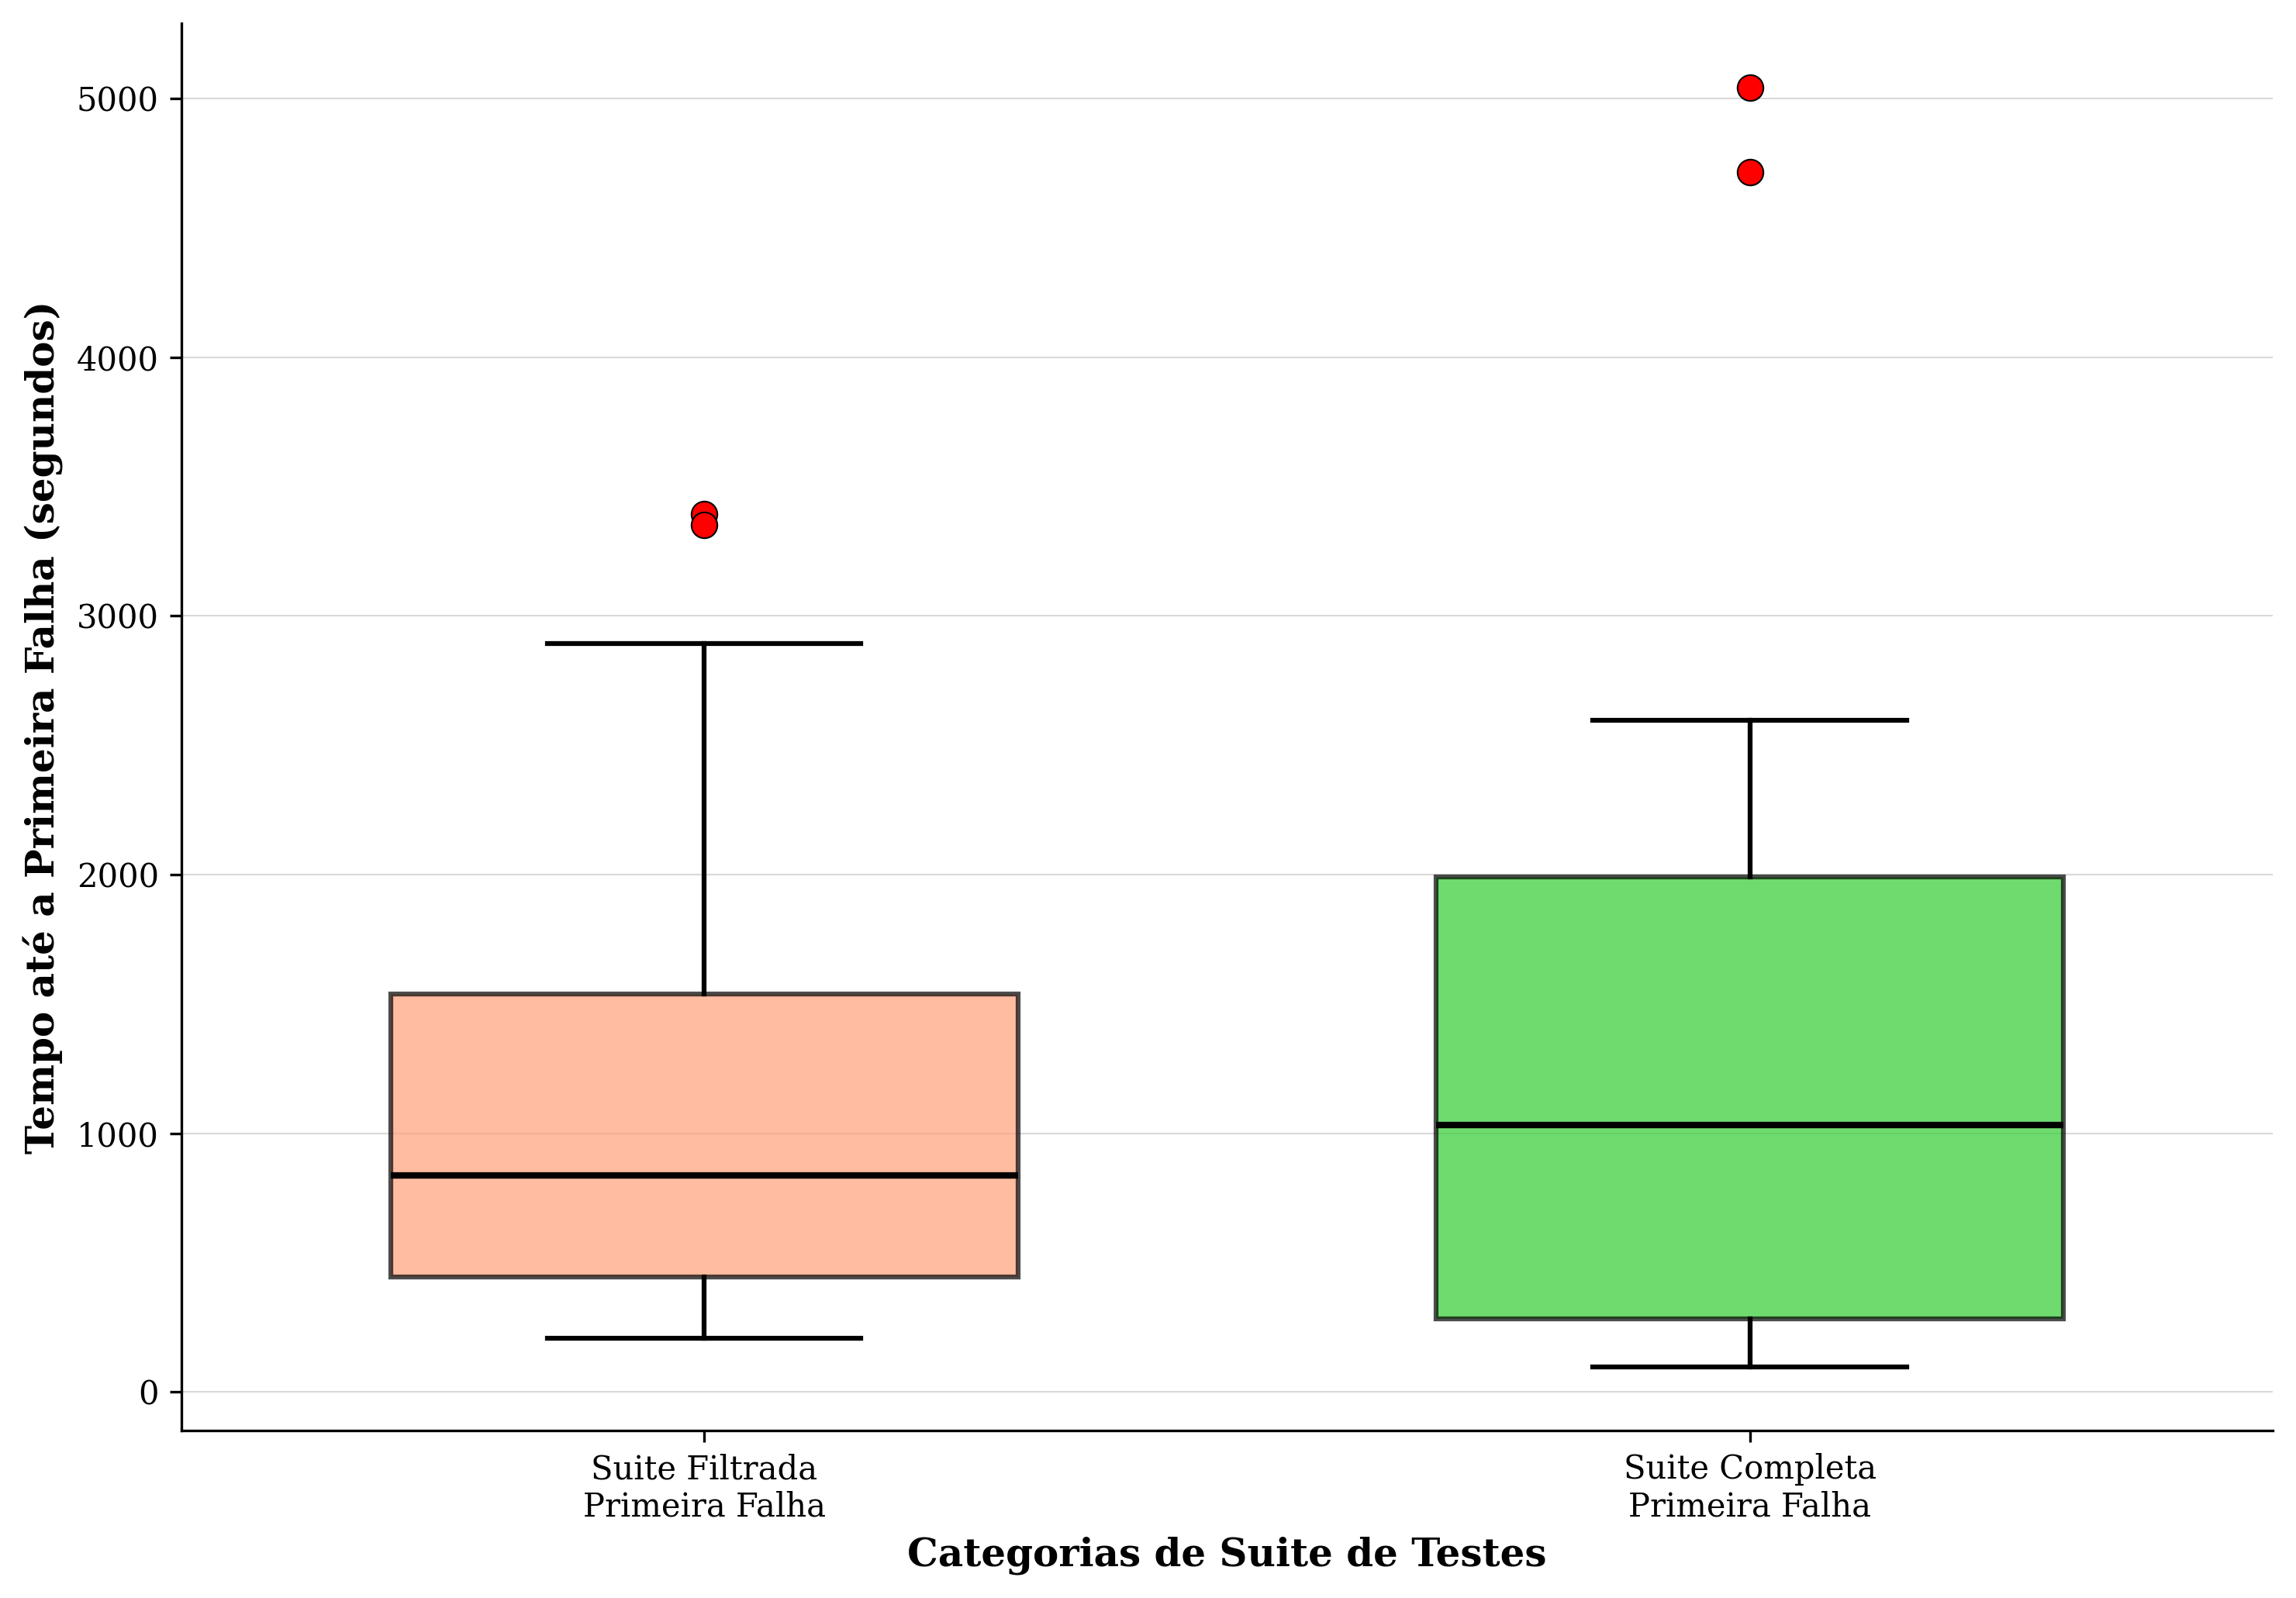

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['grid.alpha'] = 0.3

filtered_suite_firstfail = [3393.71, 365.17, 832.09, 1461.91, 1166.61, 2894.10, 510.24, 689.37, 3352.50, 837.10, 381.26, 364.40, 1461.00, 208.27, 1618.01]
complete_suite_firstfail = [1177.79, 1193.03, 4715.54, 104.21, 2596.85, 1031.32, 1546.48, 443.27, 279.35, 472.22, 105.78, 5043.27, 2438.10, 98.59, 284.20]

cor_filtered = '#FFA07A'   # Salmão claro
cor_complete = '#32CD32'   # Verde lima

fig2, ax2 = plt.subplots(figsize=(10, 7), dpi=300)

bp2 = ax2.boxplot([filtered_suite_firstfail, complete_suite_firstfail],
                   labels=['Suite Filtrada\nPrimeira Falha', 'Suite Completa\nPrimeira Falha'],
                   patch_artist=True,
                   widths=0.6,
                   medianprops=dict(color='black', linewidth=2),
                   boxprops=dict(linewidth=1.5, edgecolor='black'),
                   whiskerprops=dict(linewidth=1.5, color='black'),
                   capprops=dict(linewidth=1.5, color='black'),
                   flierprops=dict(marker='o', markerfacecolor='red', markersize=8,
                                  linestyle='none', markeredgecolor='black', markeredgewidth=0.5))

colors = [cor_filtered, cor_complete]
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_ylabel('Tempo até a Primeira Falha (segundos)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Categorias de Suite de Testes', fontsize=12, fontweight='bold')

ax2.tick_params(axis='both', which='major', labelsize=10)

ax2.grid(True, axis='y', linestyle='-', alpha=0.3, color='gray', linewidth=0.5)
ax2.set_axisbelow(True)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
for spine in ax2.spines.values():
    if spine.get_visible():
        spine.set_linewidth(0.8)
        spine.set_color('black')

datasets = [filtered_suite_firstfail, complete_suite_firstfail]
labels_stats = ['Suite Filtrada Primeira Falha', 'Suite Completa Primeira Falha']

print("=" * 60)
print("GRÁFICO 2: Análise de Tempo até Primeira Falha")
print("=" * 60)
for label, data in zip(labels_stats, datasets):
    print(f"\n{label}:")
    print(f"  Média: {np.mean(data):.2f}s")
    print(f"  Mediana: {np.median(data):.2f}s")
    print(f"  Desvio padrão: {np.std(data):.2f}s")
    print(f"  Mínimo: {np.min(data):.2f}s")
    print(f"  Máximo: {np.max(data):.2f}s")
    print(f"  Q1: {np.percentile(data, 25):.2f}s")
    print(f"  Q3: {np.percentile(data, 75):.2f}s")

print("\n" + "-" * 60)
print("Comparação entre Filtered e Complete Suite:")
print("-" * 60)
diff_media = np.mean(filtered_suite_firstfail) - np.mean(complete_suite_firstfail)
print(f"Diferença de média: {diff_media:.2f}s")
print(f"Filtered Suite é {'mais rápida' if diff_media < 0 else 'mais lenta'} em média")
print(f"Diferença percentual: {abs(diff_media / np.mean(complete_suite_firstfail) * 100):.1f}%")

plt.tight_layout()

# plt.savefig('first_failure_analysis.png', dpi=300, bbox_inches='tight',
#            facecolor='white', edgecolor='none')
# plt.savefig('first_failure_analysis.pdf', bbox_inches='tight',
#            facecolor='white', edgecolor='none')

plt.show()

print("=" * 60)